<a href="https://colab.research.google.com/github/mcbe/mmci/blob/master/block2_mnist_cnn_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


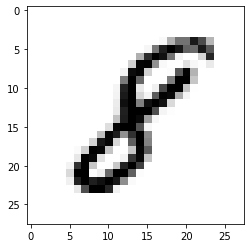

In [29]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [30]:
x_train.shape


(60000, 28, 28)

Reshape if not padded

In [25]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Pad the images

In [31]:
def pad_image(img, pad_len):
    m, n = img.shape
    i = np.random.randint(pad_len - 2) + 1
    j = np.random.randint(pad_len - 2) + 1
    img = np.concatenate([[[0] * i] * m, img, [[0] * (pad_len - i)] * m], axis=1)
    return np.concatenate([[[0] * (n + pad_len)] * j, img, [[0] * (n + pad_len)] * (pad_len - j)], axis=0)

x_train_padded = np.array([pad_image(x, 20) for x in x_train])
x_test_padded = np.array([pad_image(x, 20) for x in x_test])

In [32]:
x_train_padded.shape

(60000, 48, 48)

In [33]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_padded = x_train_padded.reshape(x_train_padded.shape[0], 48, 48, 1)
x_test_padded = x_test_padded.reshape(x_test_padded.shape[0], 48, 48, 1)
input_shape = (48, 48, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train_padded.astype('float32')
x_test = x_test_padded.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 48, 48, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [34]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(1,1), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(2304, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='Nadam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.7588 - accuracy: 0.7525
Epoch 2/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.3996 - accuracy: 0.8738
Epoch 3/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.3220 - accuracy: 0.8988
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2799 - accuracy: 0.9121
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2449 - accuracy: 0.9233
Epoch 6/10
28704/60000 [=============>................] - ETA: 1:00 - loss: 0.2086 - accuracy: 0.9351

In [23]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 95us/step


[0.0785671862062451, 0.9833999872207642]

NameError: ignored

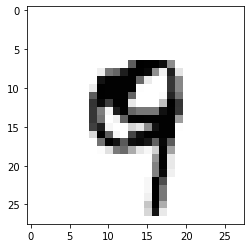

In [24]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())